# Effect of AC-coupling on a squarewave

## Setup

In [1]:
import matplotlib.pyplot as pp
import numpy as np
import scipy.fftpack
from utils import show, waves

def plot_AC_coupling_graphs(R, C, a, f, periods):

    print('Cutoff frequency = %f Hz' % show.cutoff(R, C))
    
    p = 1.0 / f                       # period, s
    samples = 10240                   # number of samplepoints
    spacing = p * periods / samples   # sample spacing; must be smaller than 1/(2 * max_freq)
    
    # Return evenly spaced numbers over a specified interval :
    t = np.linspace(0.0, samples * spacing, samples, endpoint=False)   
    
    square = waves.squarewave(a, f, t)
    discharge = waves.periodic_RC_discharge(R, C, t, f)
    
    fig2, (wave, disch, result) = pp.subplots(nrows=3, ncols=1, figsize=(10, 10))

    show.plot(t, square, wave, title="%rHz Square wave" % f)
    show.plot(t, discharge, disch, title="Capacitor discharge", ymin=-0.05, ymax=1.05)
    show.plot(t, square * discharge, result, title="Square wave affected by the capacitor discharge")

    fig3, ((fft11, fft12), (fft21, fft22)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 12))
    
    show.plot_fft(square, f, periods, fft11, title='Square ave FFT')
    show.plot_fft(square * discharge, f, periods, fft12, title='Square wave + capacitor discharge FFT')    
    show.plot_fft(square, f, periods, fft21, title='Comparison')
    show.plot_fft(square * discharge, f, periods, fft21, title='Comparison')
    show.plot_fft_diff(square, square * discharge, f, periods, fft22, title='Difference (pay attention to the Y scale)')    

    lim = fft11.get_ylim()
    fft12.set_ylim(lim)
    fft21.set_ylim(lim)
    

## R=50kΩ, C=1µF, f=20Hz

Cutoff frequency = 3.183099 Hz


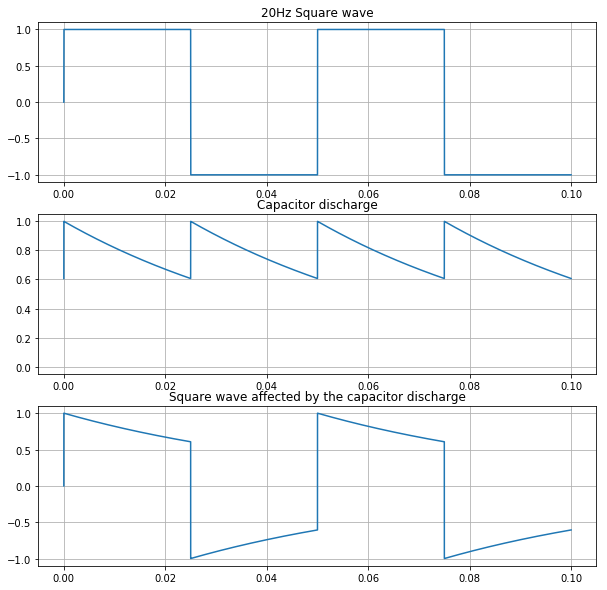

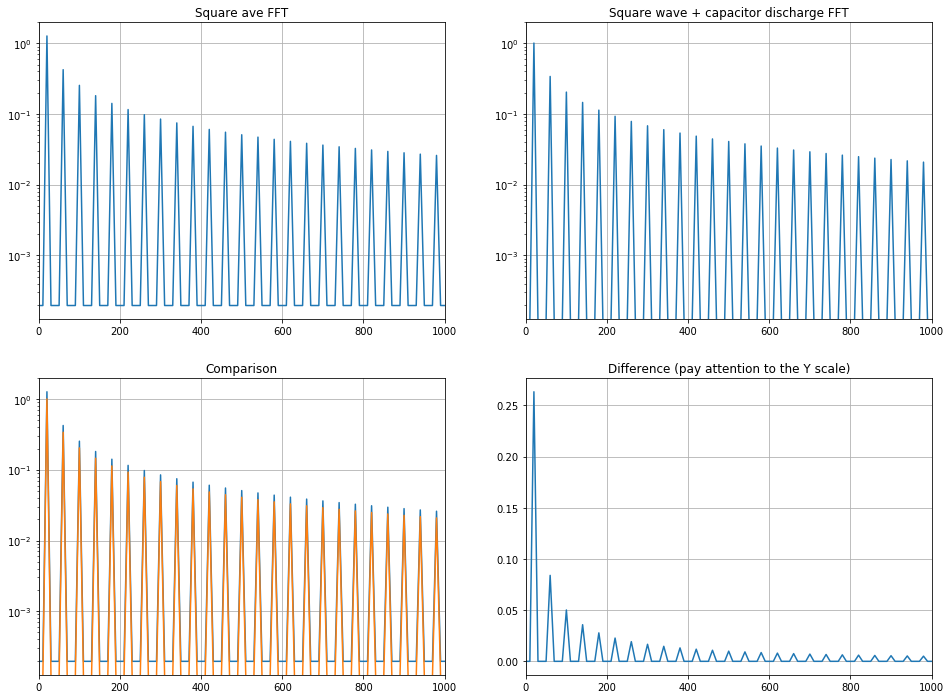

In [2]:
plot_AC_coupling_graphs(R=50.0e3, C=1.0e-6, a=1, f=20, periods=2)    

## R=200Ω, C=4.7µF, f=20Hz

Cutoff frequency = 169.313769 Hz


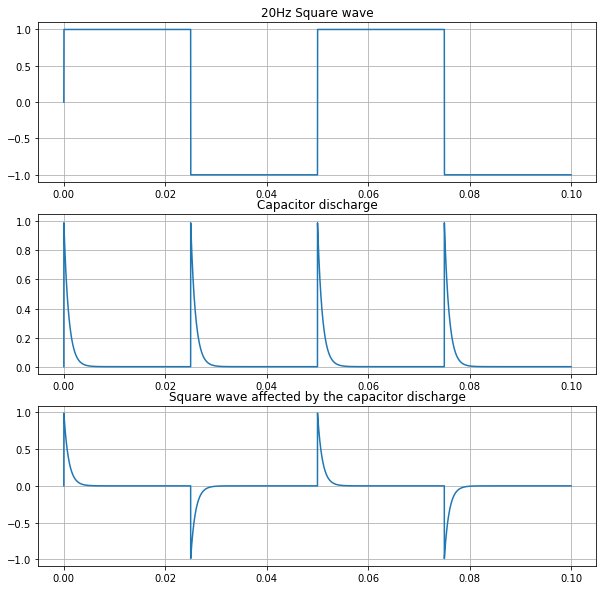

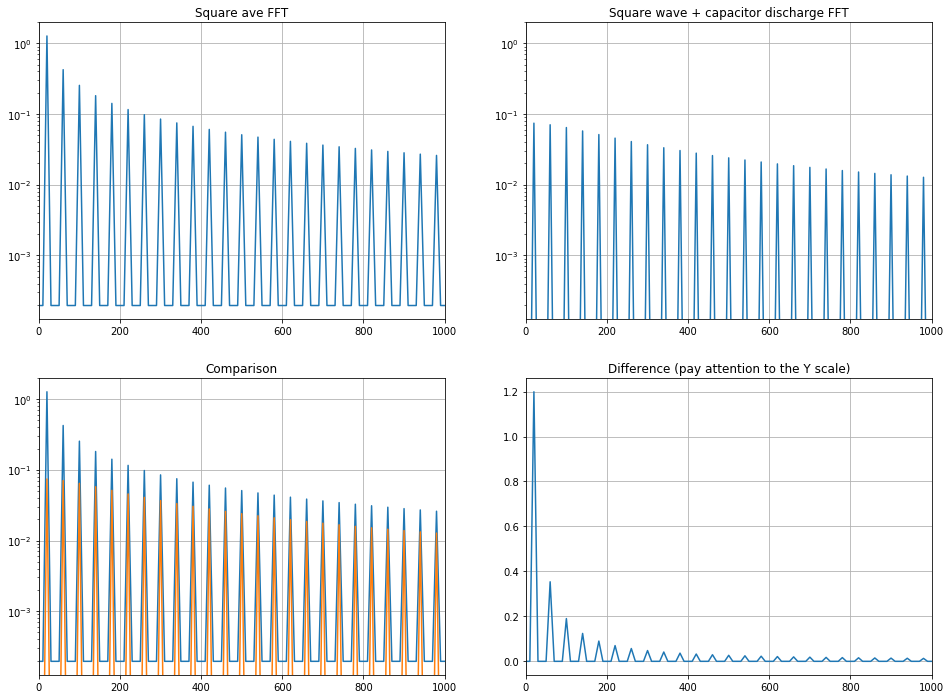

In [3]:
plot_AC_coupling_graphs(R=200.0, C=4.7e-6, a=1, f=20, periods=2)    